In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Solar panel dataset Analysis

In [2]:
import pandas as pd

data = pd.read_csv('Plant_1_Generation_Data.csv')
data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [3]:
data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
data.isnull()
#check for missing values

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
68773,False,False,False,False,False,False,False
68774,False,False,False,False,False,False,False
68775,False,False,False,False,False,False,False
68776,False,False,False,False,False,False,False


In [5]:
#check for any missing values 
data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [6]:
#type of data of each column
data.dtypes

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [7]:
data.select_dtypes(include=['object'])

,DATE_TIME,SOURCE_KEY
0,15-05-2020 00:00,1BY6WEcLGh8j5v7
1,15-05-2020 00:00,1IF53ai7Xc0U56Y
2,15-05-2020 00:00,3PZuoBAID5Wc2HD
3,15-05-2020 00:00,7JYdWkrLSPkdwr4
4,15-05-2020 00:00,McdE0feGgRqW7Ca
...,...,...
68773,17-06-2020 23:45,uHbuxQJl8lW7ozc
68774,17-06-2020 23:45,wCURE6d3bPkepu2
68775,17-06-2020 23:45,z9Y9gH1T5YWrNuG
68776,17-06-2020 23:45,zBIq5rxdHJRwDNY


# Generate the sensor data

creating a panda data file in this format

index    time    DC power    Temperature


In [8]:
data_s = data[data['SOURCE_KEY'] == '1BY6WEcLGh8j5v7']


In [9]:
data_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
data_weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [12]:
#here we exchange the column datetime as index 

data_weather.set_index('DATE_TIME',inplace = True)
data_weather.index = pd.to_datetime(data_weather.index)

print(data.index.dtype)

int64


Module T is the temperature of the surface of the PV array.
Ambient temperature is the air temperature of any object or environment where equipment is stored.

Question: Which source key has the highest total yield and why?

In [13]:
max_total_yiled = data['TOTAL_YIELD'].max()
max_total_yiled_index = data['TOTAL_YIELD'].idxmax()
print(max_total_yiled_index)

print(data.loc[[68297]])

68297
              DATE_TIME  PLANT_ID       SOURCE_KEY   DC_POWER  AC_POWER  \
68297  17-06-2020 18:30   4135001  7JYdWkrLSPkdwr4  77.714286  7.514286   

       DAILY_YIELD  TOTAL_YIELD  
68297       5856.0    7846821.0  


In [14]:
#we want to see why inverter 7JYdWkrLSPkdwr4 has the highest total yield, meybe its becasue of the weather
data_weather.loc['2020-05-17 18:30:00']
#Hence we get the important data at that date

PLANT_ID                       4135001
SOURCE_KEY             HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE          26.141087
MODULE_TEMPERATURE           25.047681
IRRADIATION                   0.000837
Name: 2020-05-17 18:30:00, dtype: object

In [15]:
print(data_weather['AMBIENT_TEMPERATURE'].idxmax())
print(data_weather['AMBIENT_TEMPERATURE'].max())

#look at the datetime, it seems that on the 17-05-2020
#we had the highest ambient temperature,
#the datetime of highest total yield and the highest ambient temperature are the same, 

2020-05-17 15:15:00
35.25248613333334


In [16]:
print(data_weather['MODULE_TEMPERATURE'].idxmax())

print(data_weather['MODULE_TEMPERATURE'].max())

#the values for both datetime and temp are different compared to expected (cell 50)

2020-05-23 12:30:00
65.54571366666664


In [17]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in data['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

36827

C:\Users\sarja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

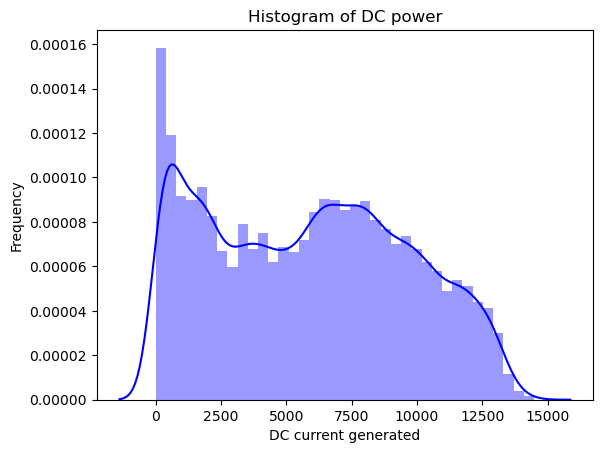

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot( DC_list , color="blue")
 
plt.title('Histogram of DC power')
plt.xlabel('DC current generated')
plt.ylabel('Frequency')

In [19]:
AC_list=[]
for i in data['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

36827

C:\Users\sarja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

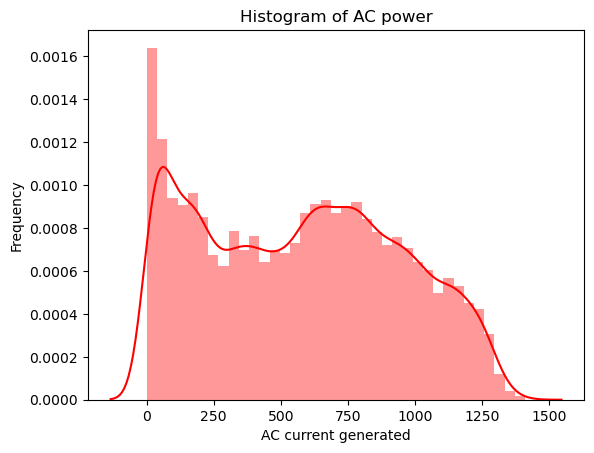

In [20]:
sns.distplot( AC_list , color="red")
 

plt.title('Histogram of AC power')
plt.xlabel('AC current generated')
plt.ylabel('Frequency')

# Output power vs efficiency

Text(0.5, 1.0, 'Output power vs efficiency')

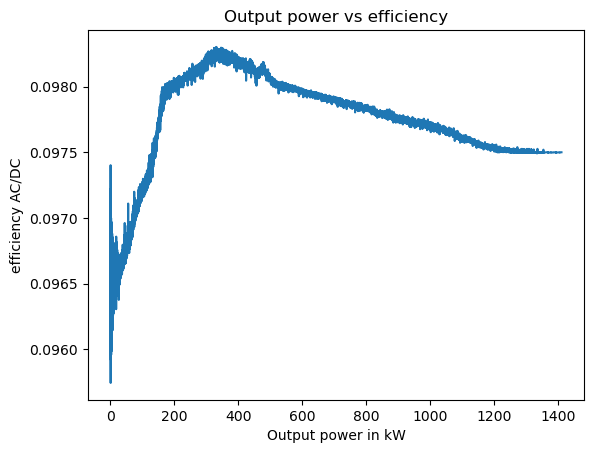

In [21]:
#eff = np.linspace(0.6,1.,36827)
#AC_list.reverse()
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff)
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency')
#compare it to a real life inverter efficency

## Compare to actual plot
source: https://www.e-education.psu.edu/eme812/node/738

[!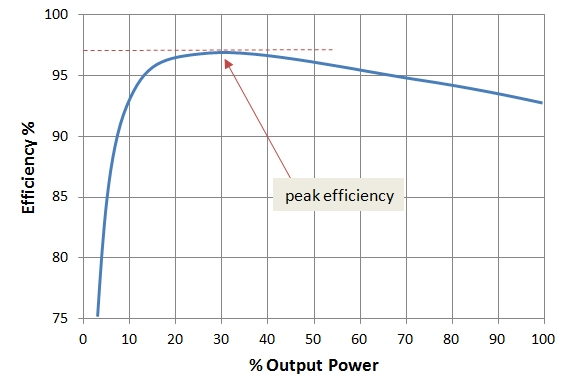](http://)

# Expore data

C:\Users\sarja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of total yield')

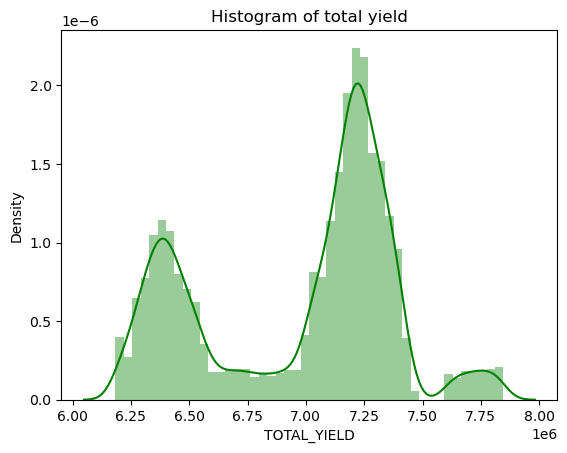

In [22]:
sns.distplot( data['TOTAL_YIELD'] , color="green")
plt.title('Histogram of total yield')

In [23]:
data['DAILY_YIELD']
DY_list=[]
for i in data['DAILY_YIELD']:
    if i>0:
        DY_list.append(i)
DY_list
DY_list.sort()
DY_list.reverse()
DY_list

[9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9163.0,
 9162.857143,
 9159.25,
 9151.0,
 9138.75,
 9123.714286,
 9102.25,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9102.0,
 9101.625,
 9096.428571,
 9081.25,
 9075.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9068.0,
 9067.714286,
 9064.375,
 9056.142857,
 9051.285714,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9048.0,
 9044.5,
 9044.125,
 9044.0,
 9036.428571,
 9030.142857,
 9029.0,
 9024.25,
 9013.0,
 9013.0,
 9013.0,
 901

C:\Users\sarja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

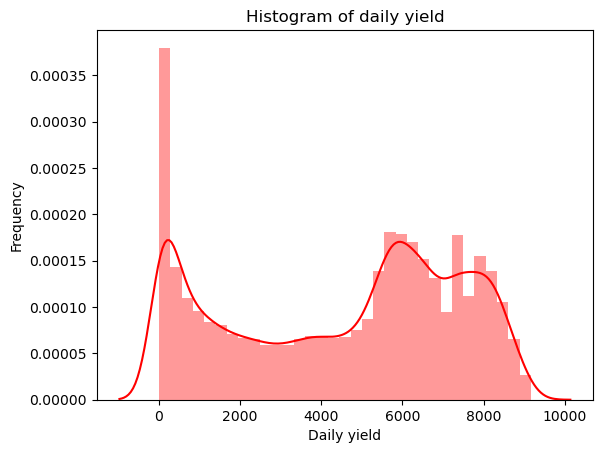

In [24]:
sns.distplot( DY_list , color="red")
 

plt.title('Histogram of daily yield')
plt.xlabel('Daily yield')
plt.ylabel('Frequency')

What is the mean value of daily yield?

In [25]:
data['DAILY_YIELD'].mean()

3295.968737182595

In [26]:
data = pd.read_csv('Plant_1_Generation_Data.csv')
data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [27]:
data.drop('PLANT_ID',1,inplace=True)
data

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\93387915.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('PLANT_ID',1,inplace=True)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,17-06-2020 23:45,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [28]:
data['DATE_TIME']= pd.to_datetime(data['DATE_TIME'],format='%d-%m-%Y %H:%M')

In [29]:
data_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [30]:
data_weather['DATE_TIME']= pd.to_datetime(data_weather['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [31]:
data_weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [32]:
data_weather.drop('PLANT_ID',1)

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3622818748.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_weather.drop('PLANT_ID',1)


,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...
3177,2020-06-17 22:45:00,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3985365891.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gen=data.groupby('DATE_TIME').sum().reset_index()


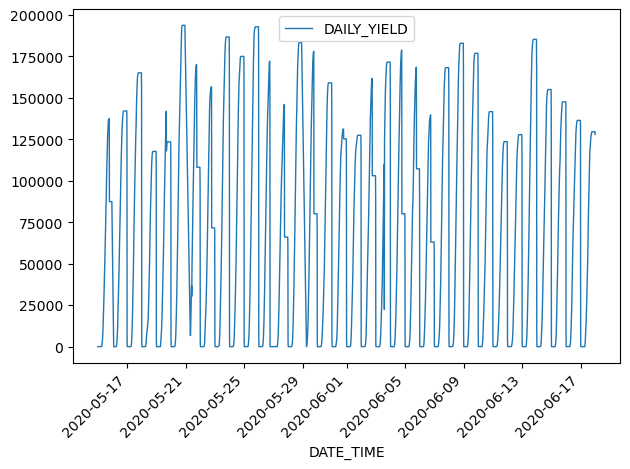

In [33]:
#so I took this from this resource:https://www.kaggle.com/virosky/how-to-manage-a-solar-power-plant
#It appears he changes the dataframe it a wierd way so that it fixes everything visually
df_gen=data.groupby('DATE_TIME').sum().reset_index()
#Returns numpy array of datetime.time. The time part of the Timestamps.
df_gen['time']=df_gen['DATE_TIME'].dt.time

df_gen.plot( x ='DATE_TIME', y = 'DAILY_YIELD',linewidth = 1)
plt.xticks(rotation=45)
plt.tight_layout()

In [34]:
df_gen['AC_POWER'].max()

29150.212499

<AxesSubplot:xlabel='DATE_TIME'>

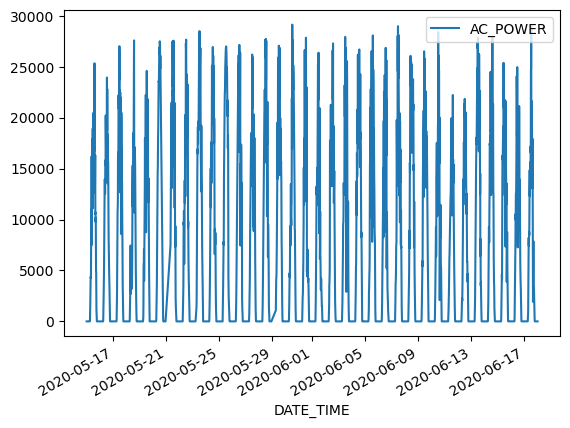

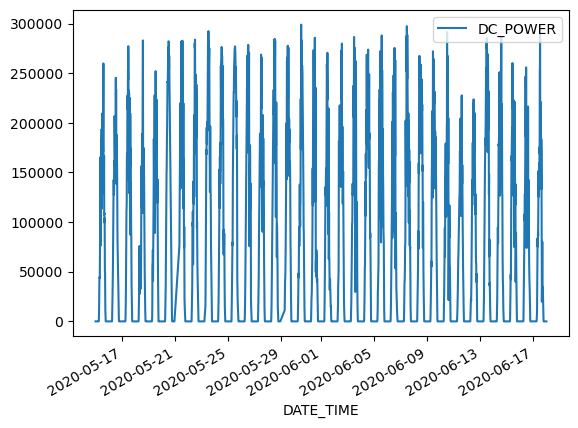

In [35]:
df_gen.plot(x = 'DATE_TIME',y = 'AC_POWER')
df_gen.plot(x = 'DATE_TIME', y = 'DC_POWER')

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3266818891.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_gen.set_index('time').drop('DATE_TIME',1)[['DC_POWER','AC_POWER']].plot(style='.',legend=True)


<AxesSubplot:xlabel='time'>

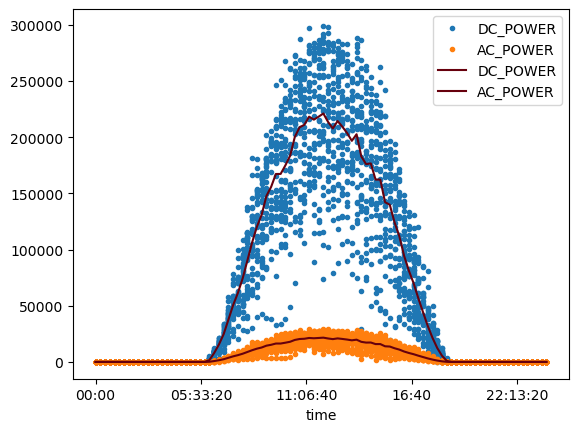

In [36]:
#used resource https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i
#and https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i
df_gen.set_index('time').drop('DATE_TIME',1)[['DC_POWER','AC_POWER']].plot(style='.',legend=True)
df_gen.groupby('time')['DC_POWER'].agg('mean').plot(legend = True,colormap='Reds_r')
df_gen.groupby('time')['AC_POWER'].agg('mean').plot(legend = True,colormap='Reds_r')

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\1588731312.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_gen.set_index('time').drop('DATE_TIME',1)['AC_POWER'].plot(style='.',legend=True,color='darkorange')


<AxesSubplot:xlabel='time'>

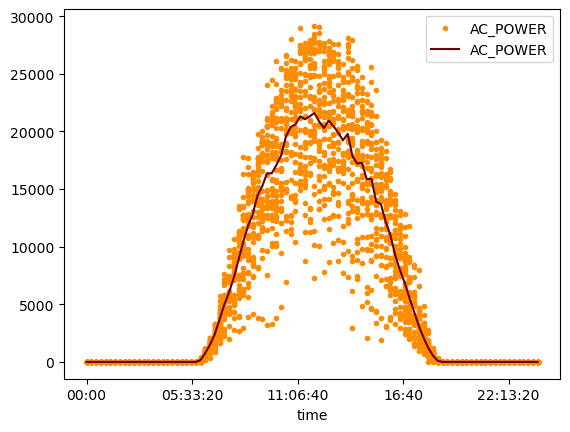

In [37]:
#used resource https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i
df_gen.set_index('time').drop('DATE_TIME',1)['AC_POWER'].plot(style='.',legend=True,color='darkorange')
df_gen.groupby('time')['AC_POWER'].agg('mean').plot(legend = True,colormap='Reds_r')

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3648915570.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_gen = daily_gen.groupby('date').sum()


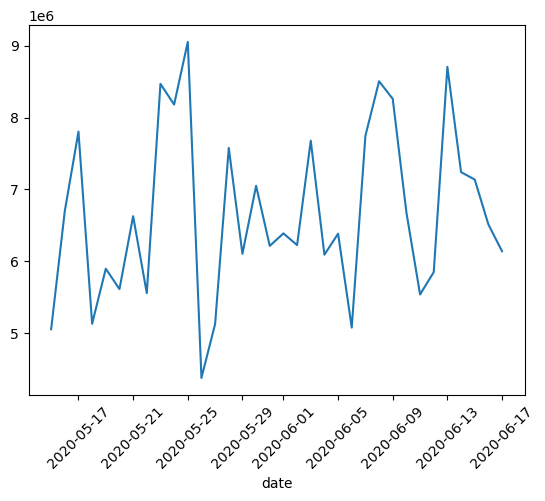

In [38]:
daily_gen = df_gen.copy()

#take the date from the ['DATE_TIME'] data
#Returns numpy array of python datetime.date objects (namely, the date part of Timestamps without timezone information).
daily_gen['date'] = daily_gen['DATE_TIME'].dt.date

daily_gen = daily_gen.groupby('date').sum()

#fig,ax = plt.subplots(ncols=2,dpi=100,figsize=(20,5))
daily_gen['DAILY_YIELD'].plot()

plt.xticks(rotation = 45)#(x = 'DATE_TIME', y = 'DAILY_YIELD')

plt.show()

<AxesSubplot:xlabel='date'>

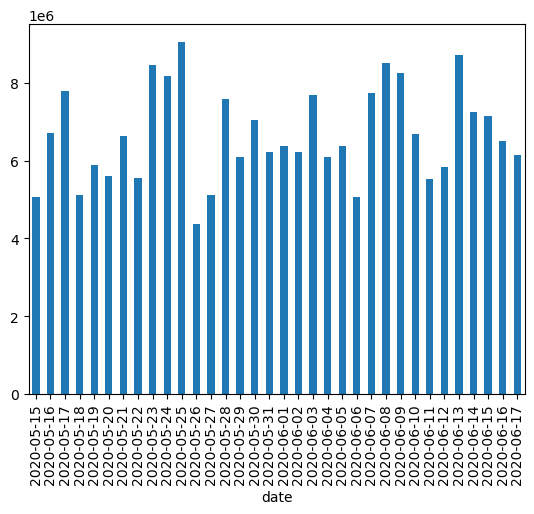

In [39]:
daily_gen['DAILY_YIELD'].plot(kind='bar')

<AxesSubplot:>

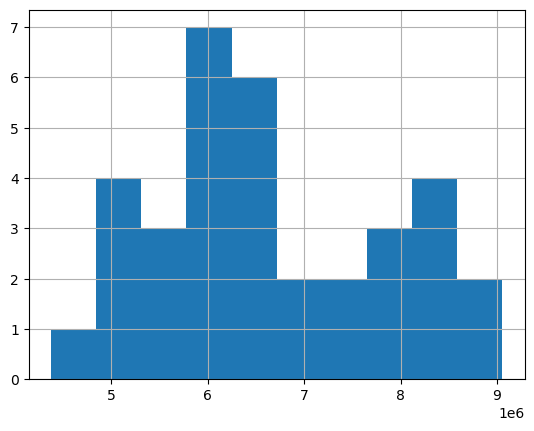

In [40]:
daily_gen['DAILY_YIELD'].hist()

(array([18399., 18403., 18407., 18411., 18414., 18418., 18422., 18426.,
        18430.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

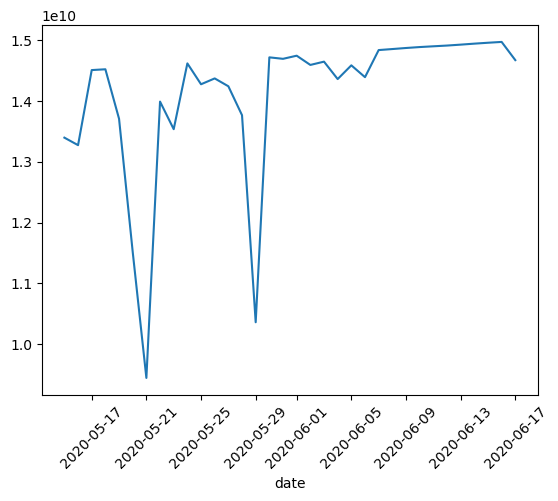

In [41]:
daily_gen['TOTAL_YIELD'].plot()
plt.xticks(rotation=45)

<AxesSubplot:>

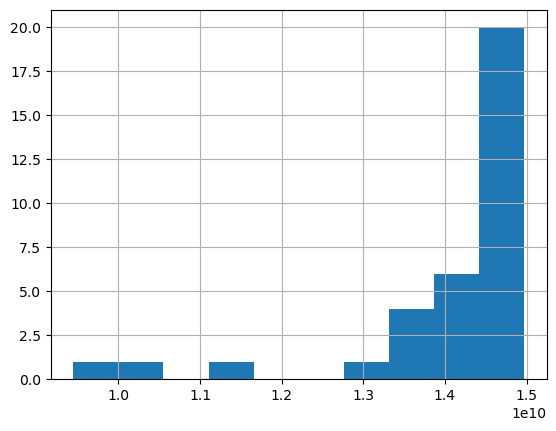

In [42]:
#daily_gen['TOTAL_YIELD'] is a Series object
#daily_gen is a DataFrame object

daily_gen['TOTAL_YIELD'].hist()

<AxesSubplot:xlabel='date'>

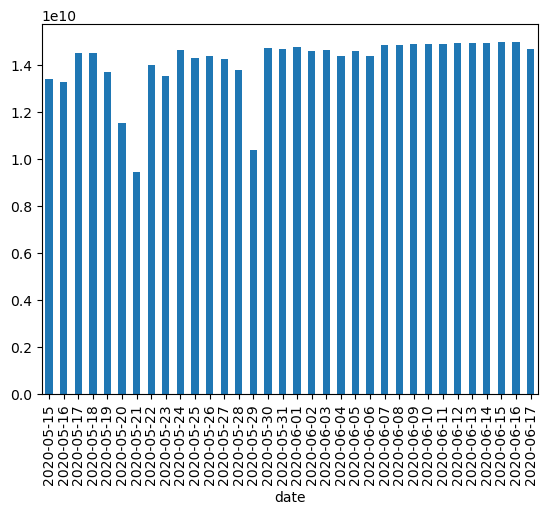

In [43]:
daily_gen['TOTAL_YIELD'].plot(kind = 'bar')

In [44]:
#Now plot these things for the weather data
data_weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\1880271925.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gen=data_weather.groupby('DATE_TIME').sum().reset_index()


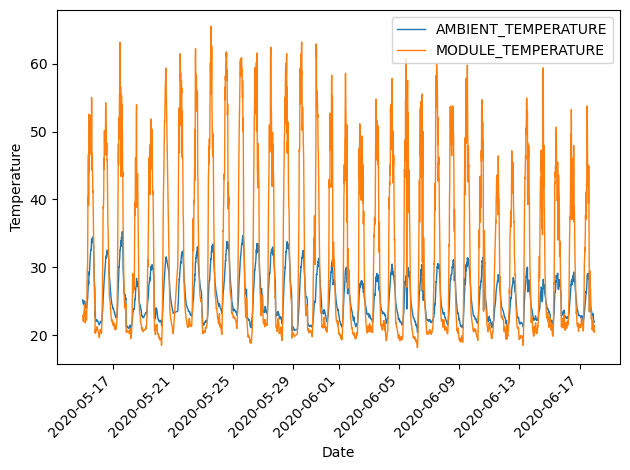

In [45]:
df_gen=data_weather.groupby('DATE_TIME').sum().reset_index()

#Returns numpy array of datetime.time. The time part of the Timestamps.
df_gen['time']=df_gen['DATE_TIME'].dt.time

df_gen.plot( x ='DATE_TIME', y = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'],linewidth = 1)
#df_gen.plot(x = 'DATE_TIME', y = 'MODULE_TEMPERATURE',color = 'orange')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.tight_layout()

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3158283869.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_gen.set_index('time').drop('DATE_TIME',1)[['IRRADIATION']].plot(kind='line')


<AxesSubplot:xlabel='time'>

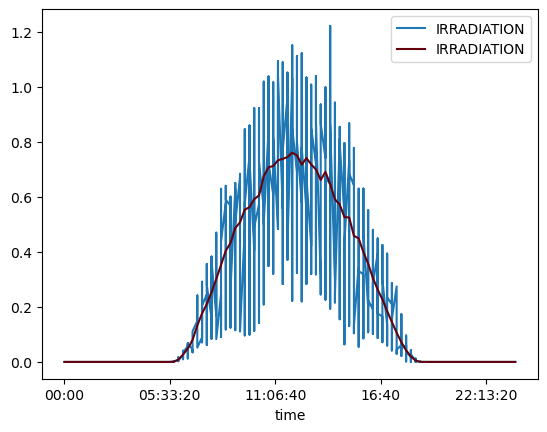

In [46]:
df_gen.set_index('time').drop('DATE_TIME',1)[['IRRADIATION']].plot(kind='line')

df_gen.groupby('time')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')

What is the total irradiation per day?

In [47]:
#I think this is it...
df_gen['IRRADIATION'].sum()

726.4914252689023

What is the max ambient and module temperature?

In [48]:
#AMBIENT_TEMPERATURE','MODULE_TEMPERATURE
print(df_gen['AMBIENT_TEMPERATURE'].max())
print(df_gen['MODULE_TEMPERATURE'].max())

35.25248613333334
65.54571366666664


How many inverters are there for each plant?

In [49]:
#PLANT_1
inverters = data.groupby('SOURCE_KEY').sum().reset_index()
#df_gen=data.groupby('DATE_TIME').sum().reset_index()

#Returns numpy array of datetime.time. The time part of the Timestamps.
#df_gen['time']=df_gen['DATE_TIME'].dt.time
inverters.count()
#so we have 22 inverters

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\747077765.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inverters = data.groupby('SOURCE_KEY').sum().reset_index()


SOURCE_KEY     22
DC_POWER       22
AC_POWER       22
DAILY_YIELD    22
TOTAL_YIELD    22
dtype: int64

In [50]:
df_DC_max=data.groupby('DATE_TIME').sum().reset_index()
df_DC_max

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\896005988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_DC_max=data.groupby('DATE_TIME').sum().reset_index()


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,0.000000,143581676.0
1,2020-05-15 00:15:00,0.0,0.0,0.000000,143581676.0
2,2020-05-15 00:30:00,0.0,0.0,0.000000,143581676.0
3,2020-05-15 00:45:00,0.0,0.0,0.000000,143581676.0
4,2020-05-15 01:00:00,0.0,0.0,0.000000,150761642.0
...,...,...,...,...,...
3153,2020-06-17 22:45:00,0.0,0.0,129571.000000,156142755.0
3154,2020-06-17 23:00:00,0.0,0.0,129571.000000,156142755.0
3155,2020-06-17 23:15:00,0.0,0.0,129571.000000,156142755.0
3156,2020-06-17 23:30:00,0.0,0.0,129571.000000,156142755.0


In [51]:
#Take the ratio AC/DC to find the efficiency of the inverter, the closer it is to 1 the better,
#so we want to take all the ac and dc generated from an inverter and tak their ratio
#remember we have 22 source keys, 
#print(inverters)
#I think I already did my job, almost....

inverter_eff = []  
for index, row in inverters.iterrows():
    a = row['DC_POWER']/row['AC_POWER']
    inverter_eff.append(a)
inverters['Efficiency'] = inverter_eff
inverters

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Efficiency
0,1BY6WEcLGh8j5v7,9.063716e+06,886665.326069,1.018950e+07,2.011452e+10,10.222252
1,1IF53ai7Xc0U56Y,1.006294e+07,984007.153452,1.047012e+07,1.969052e+10,10.226495
2,3PZuoBAID5Wc2HD,1.004313e+07,982068.208928,1.046668e+07,2.219085e+10,10.226506
3,7JYdWkrLSPkdwr4,9.815350e+06,959906.307338,1.041976e+07,2.421469e+10,10.225321
4,McdE0feGgRqW7Ca,1.003212e+07,981080.708217,1.037773e+07,2.276640e+10,10.225585
5,VHMLBKoKgIrUVDU,1.005725e+07,983449.000642,1.067493e+07,2.298201e+10,10.226510
6,WRmjgnKYAwPKWDb,9.838489e+06,962138.298813,1.026081e+07,2.231072e+10,10.225649
7,YxYtjZvoooNbGkE,9.869145e+06,965127.756186,1.024600e+07,2.268204e+10,10.225739
8,ZnxXDlPa8U1GXgE,9.997405e+06,977644.316190,1.057318e+07,2.081658e+10,10.226015
9,ZoEaEvLYb1n2sOq,9.803128e+06,958700.484522,1.015531e+07,2.255922e+10,10.225433


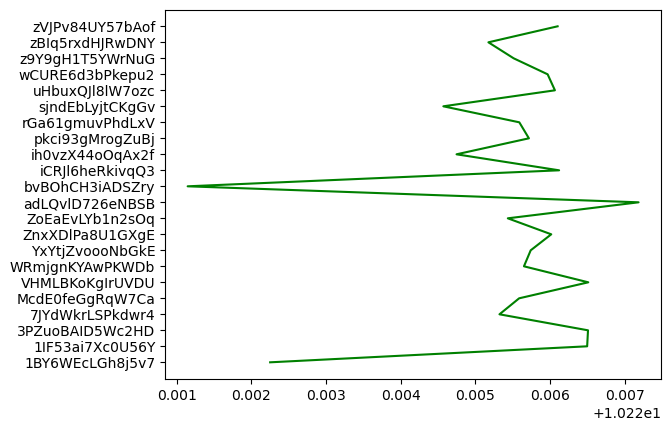

In [52]:
#inverters.plot(x='Efficiency',y='SOURCE_KEY')
#plt.plot(inverter_eff,inverters['SOURCE_KEY'],color='green')

plt.plot(inverters['Efficiency'],inverters['SOURCE_KEY'],color='green')

#inverters['AC_POWER'].plot()
#plt.xticks(rotation=90)

In [53]:
#correlation  
data_corr = data.corr()
data_corr

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\1726387737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DC_POWER,1.000000,0.999996,0.082284,0.003815
AC_POWER,0.999996,1.000000,0.082234,0.003804
DAILY_YIELD,0.082284,0.082234,1.000000,0.009867
TOTAL_YIELD,0.003815,0.003804,0.009867,1.000000


# Correlation

<AxesSubplot:>

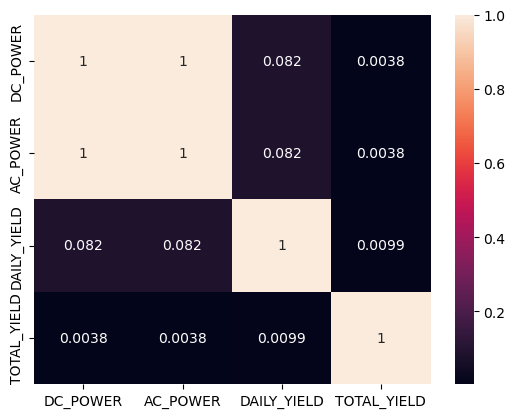

In [54]:
sns.heatmap(data_corr,annot=True)

In [55]:
data_weather_corr  = data_weather.corr()
data_weather_corr = data_weather_corr.drop('PLANT_ID')

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3188550195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_weather_corr  = data_weather.corr()


<AxesSubplot:>

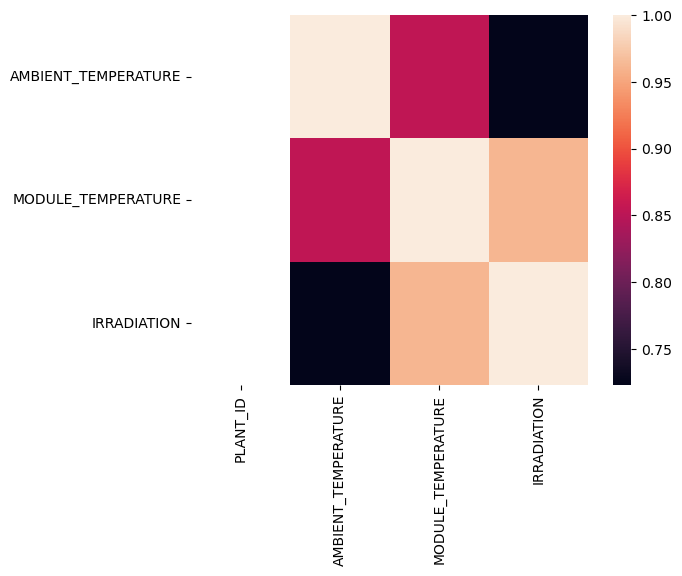

In [56]:
sns.heatmap(data_weather_corr)

In [57]:
#daily_gen = df_gen.copy()

#take the date from the ['DATE_TIME'] data
#Returns numpy array of python datetime.date objects (namely, the date part of Timestamps without timezone information).
#daily_gen['date'] = daily_gen['DATE_TIME'].dt.date

#daily_gen = daily_gen.groupby('date').sum()

power_sensor = data.merge(data_weather, left_on='DATE_TIME', right_on='DATE_TIME')
power_sensor = power_sensor.drop(['SOURCE_KEY_x','PLANT_ID','SOURCE_KEY_y','TOTAL_YIELD'],axis=1)

power_sensor['DATE_TIME']=power_sensor['DATE_TIME'].dt.date
power_sensor

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,0.0,0.0,0.000,25.184316,22.857507,0.0
1,2020-05-15,0.0,0.0,0.000,25.184316,22.857507,0.0
2,2020-05-15,0.0,0.0,0.000,25.184316,22.857507,0.0
3,2020-05-15,0.0,0.0,0.000,25.184316,22.857507,0.0
4,2020-05-15,0.0,0.0,0.000,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...
68769,2020-06-17,0.0,0.0,5967.000,21.909288,20.427972,0.0
68770,2020-06-17,0.0,0.0,5147.625,21.909288,20.427972,0.0
68771,2020-06-17,0.0,0.0,5819.000,21.909288,20.427972,0.0
68772,2020-06-17,0.0,0.0,5817.000,21.909288,20.427972,0.0


C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3651145704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  power_sensor_corr = power_sensor.corr()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'DC_POWER'),
  Text(1.5, 0, 'AC_POWER'),
  Text(2.5, 0, 'DAILY_YIELD'),
  Text(3.5, 0, 'AMBIENT_TEMPERATURE'),
  Text(4.5, 0, 'MODULE_TEMPERATURE'),
  Text(5.5, 0, 'IRRADIATION')])

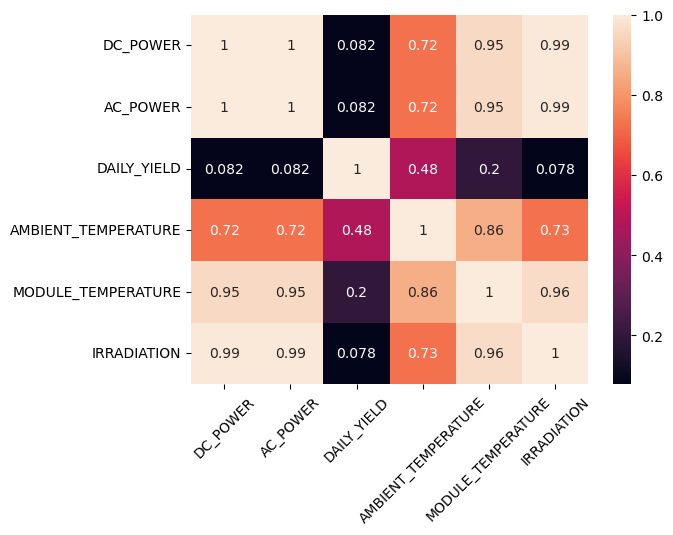

In [58]:
power_sensor_corr = power_sensor.corr()
sns.heatmap(power_sensor_corr,annot=True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

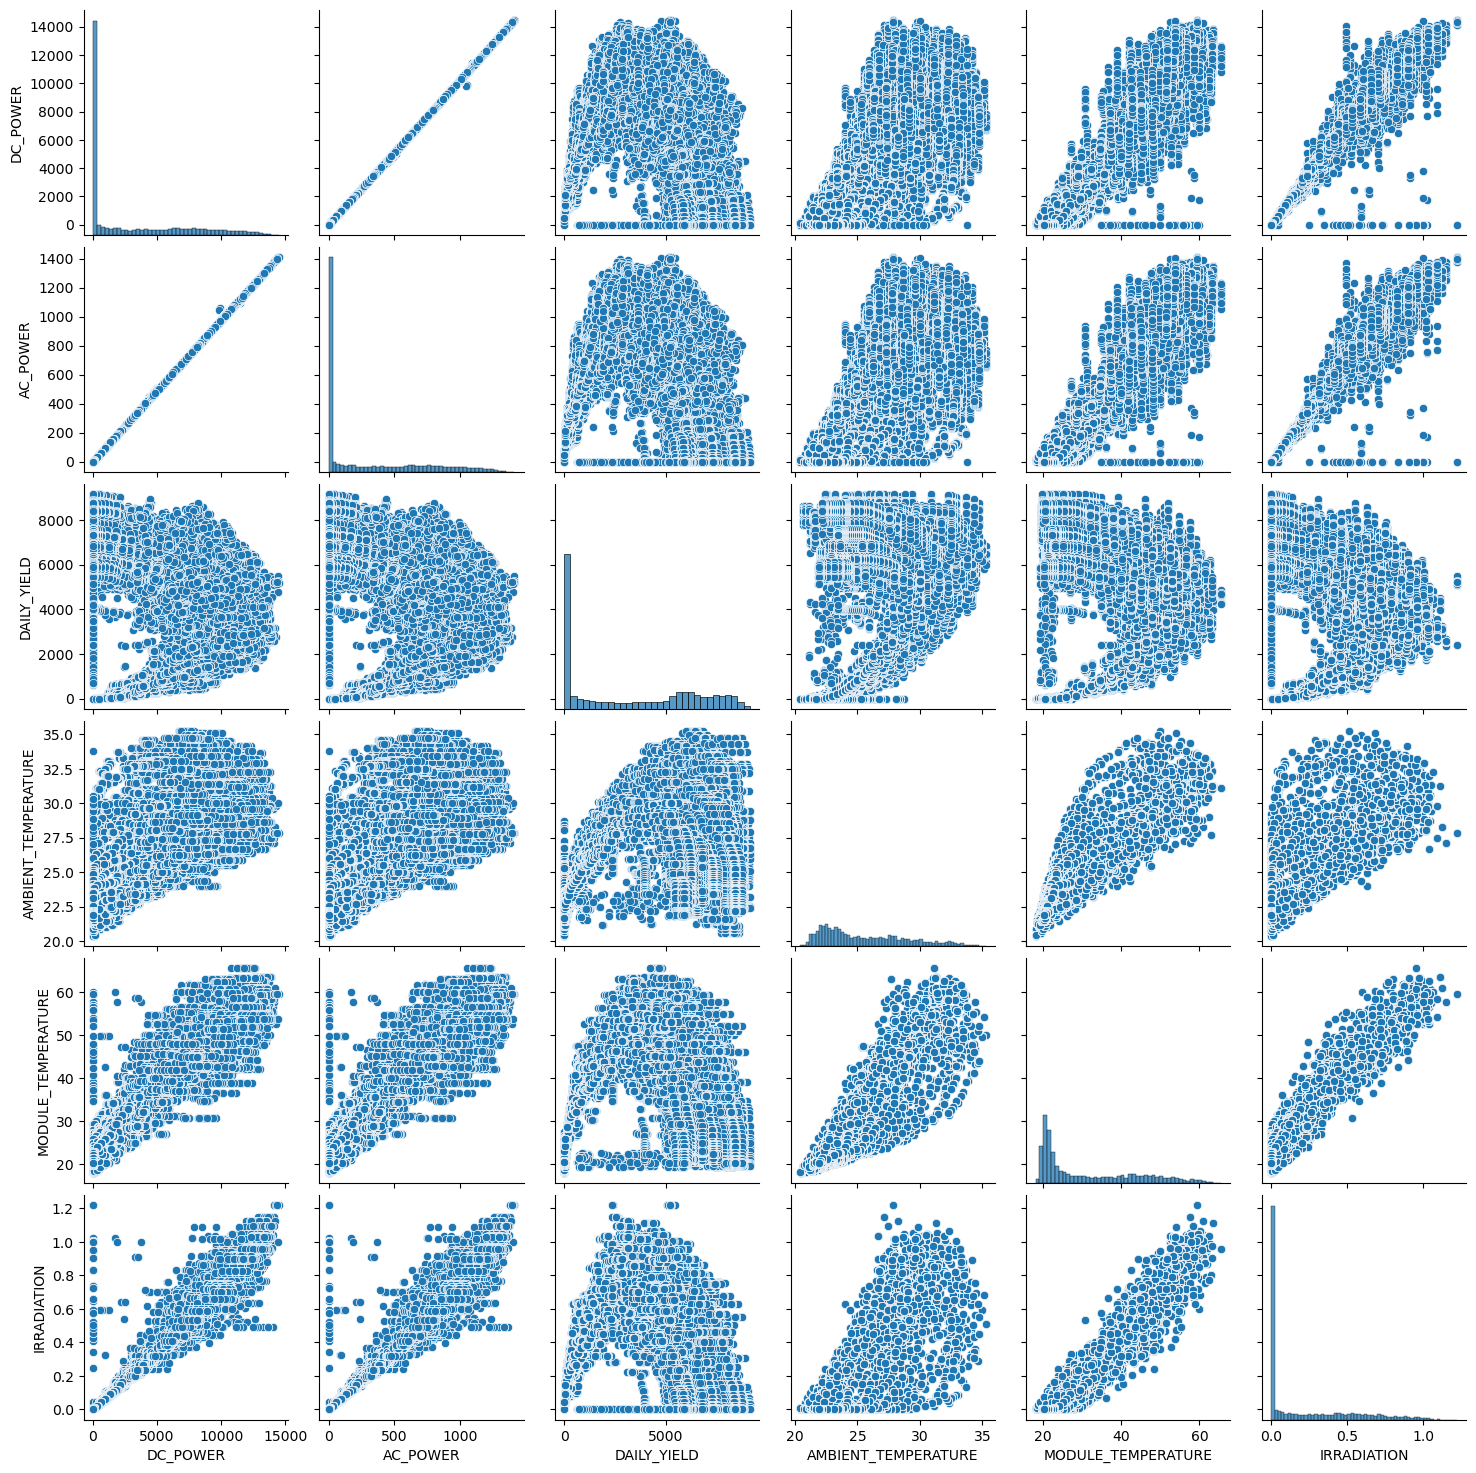

In [59]:
sns.pairplot(power_sensor)

# Apply Linear Regression Algorithm

In [60]:
power_sensor_ML = data.merge(data_weather, left_on='DATE_TIME', right_on='DATE_TIME')
power_sensor_ML = power_sensor_ML.drop(['PLANT_ID','SOURCE_KEY_y','TOTAL_YIELD'],axis=1)
power_sensor_ML

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,21.909288,20.427972,0.0


In [61]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import datetime as dt
#from sklearn.linear_model import LinearRegression
#wait a second, this is a regression problem not a classification one,
#so I will use Linear regression

X = power_sensor_ML[['DATE_TIME','AMBIENT_TEMPERATURE','DC_POWER','MODULE_TEMPERATURE','IRRADIATION']]
#linear regression cant work with datetime, so covert it to interger
#X.columns = ["DATE_TIME"]
X['DATE_TIME'] = pd.to_datetime(X['DATE_TIME'])
X['DATE_TIME']=X['DATE_TIME'].map(dt.datetime.toordinal)

y = power_sensor_ML['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 211)

C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3334735771.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DATE_TIME'] = pd.to_datetime(X['DATE_TIME'])
C:\Users\sarja\AppData\Local\Temp\ipykernel_15084\3334735771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DATE_TIME']=X['DATE_TIME'].map(dt.datetime.toordinal)


In [62]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(48141, 5) (20633, 5) (48141,) (20633,)


In [63]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

y_predict = reg.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error
accuracy = mean_squared_error(y_test,y_predict, squared = False)
accuracy
R_square_sk = reg.score(X_test,y_test)
print(R_square_sk) #24% accuracy
#let me remove datetime and see if things imporve
print(accuracy) 
#compare the accuracy with and without data, without we have 93%, with we have 92%

0.9999944637856576
0.92889799779795
